# FlameStream workers scalability comparision

In [2]:
prep <- function(path) {
    return (tail(scan(path, sep = ","), -200) / 1e6)
}
fl.9de103d <- prep("fl-9de103d.data")
fl.9ce9e39 <- prep("fl-9ce9e39.data")
fs.9de103d <- prep("fs-9de103d.data")

st.barrier.async <- prep("fix-or-not/st-replay-barrier-async.data")

tmp.nob <- prep("tmp-nob.data")

sizes <- tail(scan("1k.data", sep = ","), -200)

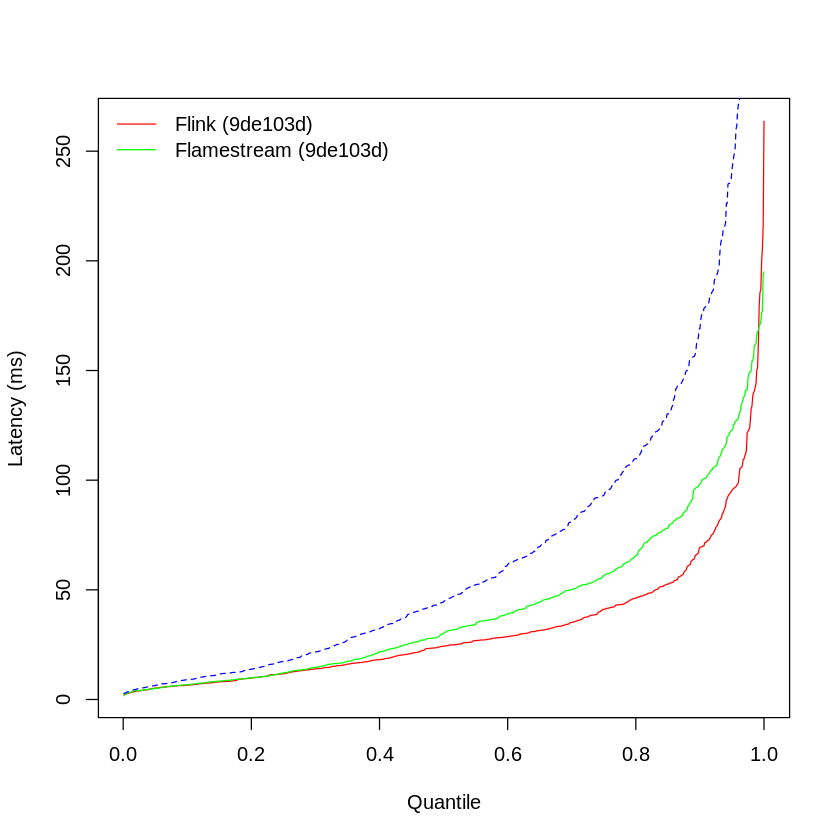

In [4]:
quntiles.1000 <- seq(1, length(fl.9de103d)) / length(fl.9de103d)
plot(quntiles.1000, sort(fl.9de103d), type = "l", col = "red",  xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles.1000, sort(fs.9de103d), col = "green")
lines(quntiles.1000, sort(st.barrier.async), col = "blue", lty = 2)
legend(
    "topleft", 
    legend = c("Flink (9de103d)", "Flamestream (9de103d)"), 
    col = c("red", "green", "blue"),
    lty = c(1, 1, 3, 1),
    bty = "n",
    text.col = "black"
)

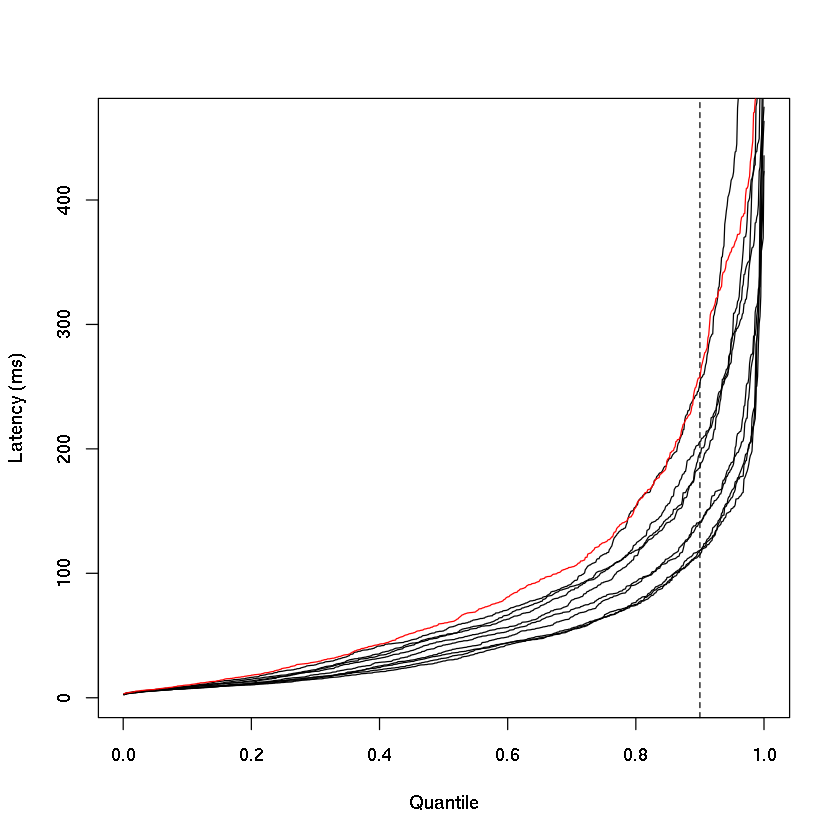

In [73]:
lat.300 <- prep("../FlameStream/benchmark/ansible/lat-1000/10/300/lat.data")
quntiles.1000 <- seq(1, length(lat.300)) / length(lat.300)
plot(quntiles.1000, sort(lat.300), type = "l", xlab = "Quantile", ylab = "Latency (ms)")
abline(v = 0.9, lty=2)
for (rate in c(250, 200, 150, 125, 100, 90, 80, 70)) {
    path <- capture.output(cat("../FlameStream/benchmark/ansible/lat-1000/10/", rate, "/lat.data", sep=''))
    data <- prep(path)
    lines(quntiles.1000, sort(data))
}
for (rate in c(70)) {
    path <- capture.output(cat("../FlameStream/benchmark/ansible/lat/10/", rate, "/lat.data", sep=''))
    data <- prep(path)
    lines(quntiles.1000, sort(data), col = 'red')
}

In [54]:
capture.output(cat("../FlameStream/benchmark/ansible/lat/10/", rate, "/lat.data", sep=''))

[1] "../FlameStream/benchmark/ansible/lat/10/250/lat.data"

In [18]:
bars <- function(a, b, col.names = c("FlameStream", "Flink")) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- col.names
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

In [ ]:
bars(fs.tmp, fl.5fa0780, c("Flamestream", "Flink"))

In [3]:
wilcox.test(fs.tmp, fl.5fa0780, paired = T)

ERROR: Error in wilcox.test(fs.tmp, fl.5fa0780, paired = T): object 'fs.tmp' not found


# Comparing cpu usage of different flatmap placement

..79.233 - node with flatmap

..2.233 - input node

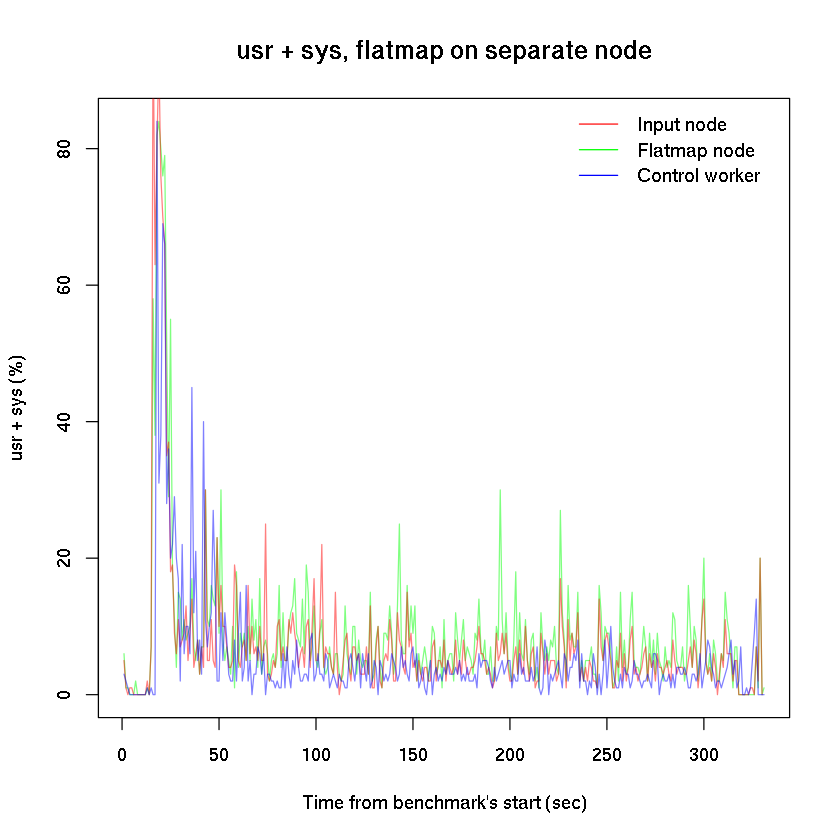

In [4]:
input <- read.table("vmstat/input.data", sep = "" , header = T, skip = 1)
fm <- read.table("vmstat/fm.data", sep = "" , header = T, skip = 1)
control <- read.table("vmstat/control1.data", sep = "" , header = T, skip = 1)

plot(fm$us + fm$sy, t="l", col = rgb(0, 1, 0, 0.5), 
     main = "usr + sys, flatmap on separate node", 
     xlab = "Time from benchmark's start (sec)",
     ylab = "usr + sys (%)")
lines(input$us + input$sy, col=rgb(1, 0, 0, 0.5))
lines(control$us + control$sy, col=rgb(0, 0, 1, 0.5))
legend(
    "topright", 
    legend = c("Input node", "Flatmap node", "Control worker"), 
    col = c("red", "green", "blue"),
    lty = c(1, 1, 1),
    bty = "n",
    text.col = "black"
)

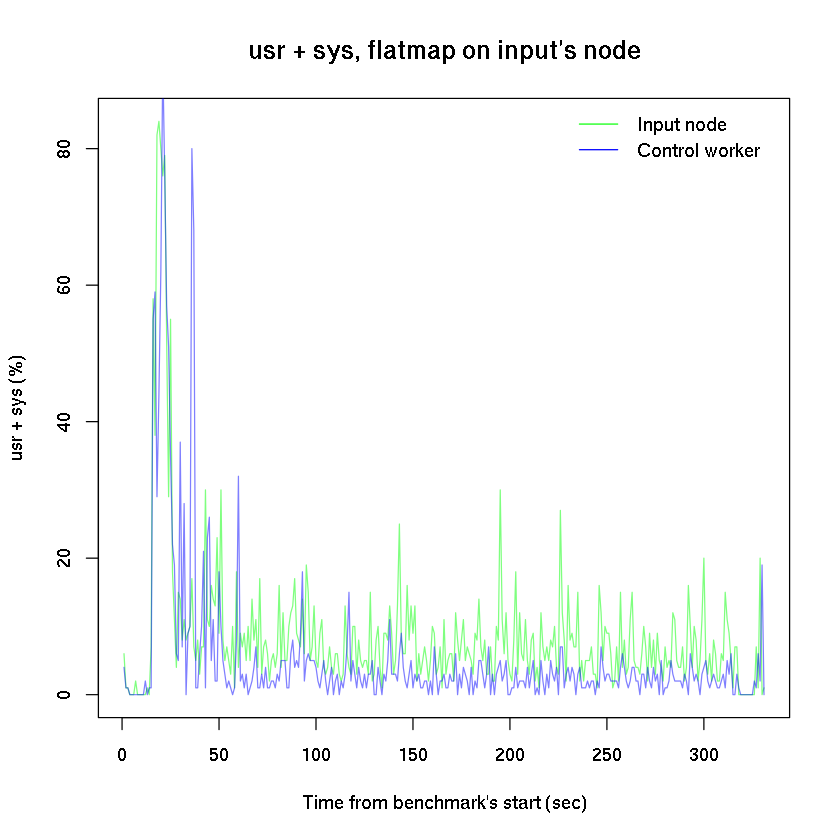

In [5]:
input <- read.table("vmstat/fm-input.data", sep = "" , header = T, skip = 1)
control <- read.table("vmstat/control2.data", sep = "" , header = T, skip = 1)

plot(fm$us + fm$sy, t="l", col = rgb(0, 1, 0, 0.5), 
     main = "usr + sys, flatmap on input's node",
     xlab = "Time from benchmark's start (sec)",
     ylab = "usr + sys (%)")
lines(control$us + control$sy, col=rgb(0, 0, 1, 0.5))
legend(
    "topright", 
    legend = c("Input node", "Control worker"), 
    col = c("green", "blue"),
    lty = c(1, 1, 1),
    bty = "n",
    text.col = "black"
)